In [78]:
import cv2
import hashlib
from PIL import Image
import matplotlib.pyplot as plt

# Load Image

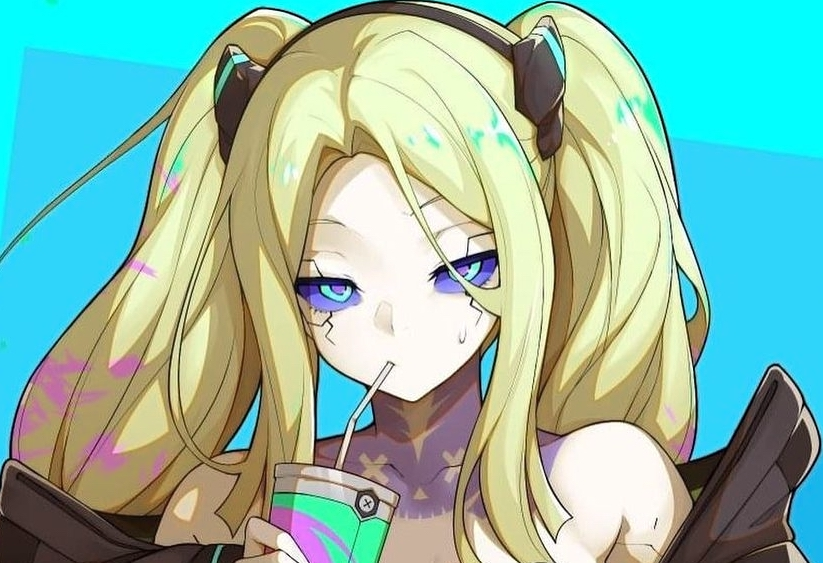

In [82]:
im_path = "E:\\software\\Task1\\rebecca.jpg"

image = cv2.imread(im_path)
#image = Image.open(im_path)

display(Image.fromarray(image))

# Split Image into Parts

274 281


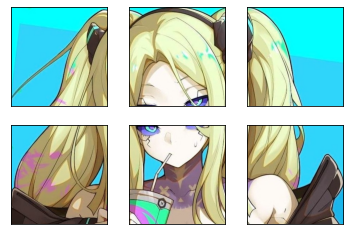

In [81]:
def split_image_into_parts(image, cols=3, rows=2):
    
    width = image.width // cols
    height = image.height // rows
    print(width , height)
    parts = []
    
    for i in range(rows):
        for j in range(cols):
            left = j * width
            upper = i * height
            right = left + width
            bottom =  upper + height
            part = image.crop((left , upper , right , bottom))
            parts.append(part)
            
    return parts
    
#image = Image.open(im_path)
im_parts = split_image_into_parts(Image.fromarray(image), cols=3, rows=2)

# Display the Images
for i in range(6):
    plt.subplot(2,3 , i+1)
    plt.imshow(im_parts[i])
    plt.xticks([]) , plt.yticks([])

plt.show()

# Joining Back of Parts

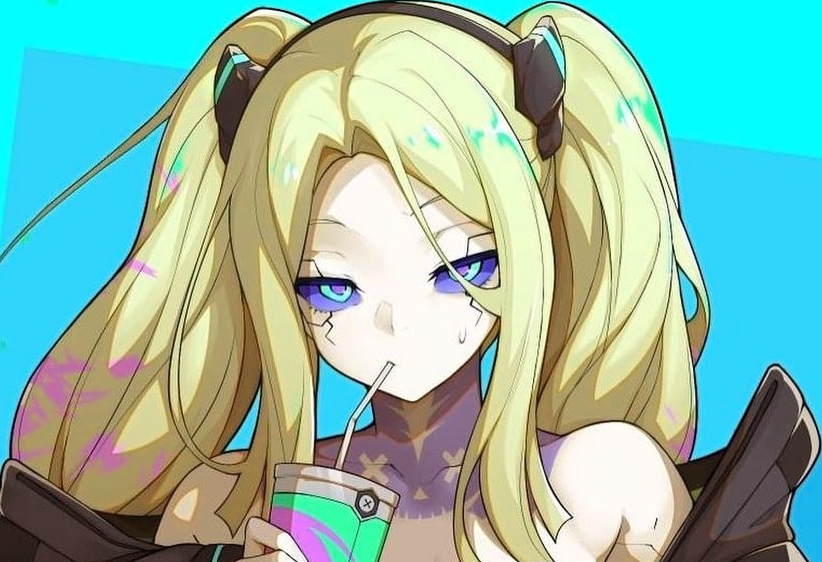

In [70]:
def join_image_parts(imgs):
    
    # Get the Width and Height of First Part Image 
    width =  imgs[0].width
    height = imgs[0].height
    
    # Create the New Image
    finalImage = Image.new("RGB" , (width * 3 , height * 2))
    
    # Now Merge The All Parts of Image
    for index , image in enumerate(imgs):
        x = (index % 3)  * width
        y = (index // 3) * height
        finalImage.paste(image , (x,y))
    return finalImage

joined_image = join_image_parts(im_parts)
display(joined_image)

# Save joined Image


In [72]:
joined_image.save("E:\\software\\Task1\\newRebaccia.jpg")

# Compare Original and Saved Image Hashes (should be same)

In [73]:
def get_hash(file_path):
    return hashlib.md5(cv2.imread(file_path).tobytes()).hexdigest()

# Compare Hashes
im_path     = "E:\\software\\Task1\\rebecca.jpg"
new_im_path = "E:\\software\\Task1\\newRebaccia.jpg"

print("Hash of original Image:",get_hash(im_path))
print("Hash of New Image:",get_hash(new_im_path))

Hash of original Image: bf75c3e868ea5c763df58a56938c6a53
Hash of New Image: ba40553516a76004565840bcb9b3c96a
